In [67]:
import sqlite3
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np



In [2]:
connect = sqlite3.connect('/Users/koppakapremsai/Downloads/testClaims_hu.db')

In [3]:
connect.execute('select name from sqlite_master where type = \'table\'').fetchall()

[('highUtilizationPredictionV2wco',)]

In [4]:
df = pd.read_sql('select * from highUtilizationPredictionV2wco', connect)

In [110]:
cols = df.columns.tolist()

In [111]:
cols.remove('race')
cols.remove('patient_id')
cols.remove('HighUtilizationY2')
cols.remove('claimCount')
cols.remove('index')

In [112]:
df[cols]

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,ELIX8,ELIX9,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
26904,74,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,0
107180,69,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
107985,72,0,0,0,0,0,0,0,1,0,...,2,0,2,1,2,2,3,0,3,2
56093,76,0,0,0,0,0,0,0,0,0,...,4,0,6,4,5,5,7,5,5,5
91795,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47411,90,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
64018,78,1,0,0,1,0,1,0,1,1,...,3,5,4,2,6,2,4,6,0,0
44909,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54416,67,0,0,0,1,0,1,0,1,0,...,7,7,1,0,7,7,7,0,7,0


In [8]:
size=df.index.size

In [10]:
df = shuffle(df)

In [11]:
#1. Create a plot that shows performance (AUC) of random forest models with 10, 20, 30, … 200 trees, and on training and testing data
#(build all 20 models to complete the assignment). Use highUtilizationPredictionV2wco dataset.

In [13]:
train = df[:int(size*0.8)]
test = df[int(size*0.8):]

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier()
rf.fit(train[cols],train['HighUtilizationY2'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
probs = rf.predict_proba(test[cols])[:,1]
probs

array([0. , 0. , 0.3, ..., 0.1, 0. , 0.3])

In [17]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [19]:
fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)

In [20]:
auc(fpr,tpr)

0.7500806896185406

In [22]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(train[cols],train['HighUtilizationY2'])
probs = rf.predict_proba(test[cols])[:,1]
fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
auc(fpr,tpr)

0.8222160788080835

In [28]:

x = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(train[cols],train['HighUtilizationY2'])
    probs = rf.predict_proba(test[cols])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    a=auc(fpr,tpr)
    print(n)
    print("trees")
    print(a)
    x.append(a)

10
trees
0.7495341353436051
20
trees
0.784477717777973
30
trees
0.7932512237870899
40
trees
0.8029819038466615
50
trees
0.8057076672755719
60
trees
0.8087730868422673
70
trees
0.8115489374349596
80
trees
0.8146295845473619
90
trees
0.8153190648937743
100
trees
0.8136571010826752
110
trees
0.8168573253631376
120
trees
0.8183347575181995
130
trees
0.8165191101113982
140
trees
0.8194486606734976
150
trees
0.8159698541751277
160
trees
0.8182680510437812
170
trees
0.8204847887297562
180
trees
0.8181049361939637
190
trees
0.8194043861750127
200
trees
0.8170320000487281


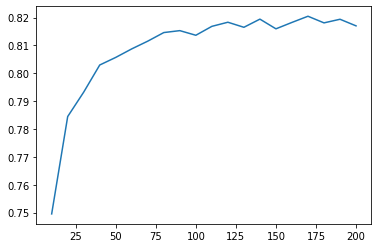

In [31]:
from matplotlib import pyplot as plt
plt.plot(list(range(10,201,10)),x)

In [32]:
#2. Rank input attributes in the data. Create a plot that shows
#dependency between number of selected top attributes and AUC of learned model. 
#You can use any attribute selection method and two different classification methods of your choice. Use highUtilizationPredictionV2wco dataset. For all questions below, make sure sufficient detail are provided in areas
#where learning curves are "interesting".

In [33]:
res = pd.DataFrame()
res['cols'] = cols

In [34]:
res['vals'] = rf.feature_importances_

In [35]:
highattributes=res.sort_values('vals',ascending=False)
rank=highattributes['cols']
rank

0              age
6            ELIX6
14          ELIX14
63    drugs_m11-12
50            G-22
          ...     
38            G-10
43            G-15
51            G-23
47            G-19
32             G-4
Name: cols, Length: 64, dtype: object

In [37]:
r=[]
for i in range(1,len(res.index)):
    c = list(res[:i]['cols'])
    print(c)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train[c],train['HighUtilizationY2'])
    probs = rf.predict_proba(test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    a=auc(fpr,tpr)
    print(a)
    r.append(a)

['age']
0.5190284066099207
['age', 'ELIX1']
0.5921186284100943
['age', 'ELIX1', 'ELIX2']
0.5922774697228909
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6088584986373475
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6225926314528527
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6344699369933279
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.7180845705796087
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.7089384317907143
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.7004302616721102
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6857913997834609
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6872491343713346
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6670329464488807
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7833633889063432
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7956049602633102
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7964146236048703
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20'

0.8164292348443185
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.8158964836027496
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17'

In [38]:
t=r

In [39]:
t

[0.5190284066099207,
 0.5921186284100943,
 0.5922774697228909,
 0.6088584986373475,
 0.6225926314528527,
 0.6344699369933279,
 0.7180845705796087,
 0.7089384317907143,
 0.7004302616721102,
 0.6857913997834609,
 0.6872491343713346,
 0.6670329464488807,
 0.6577862894846167,
 0.6598201656324707,
 0.6651802453475264,
 0.6675605727207655,
 0.6793279943265766,
 0.6785811077702203,
 0.6836908171611886,
 0.6891685091996972,
 0.6905403309571158,
 0.7076311715523511,
 0.7099240305931546,
 0.7097319834064942,
 0.7118593697839517,
 0.7145182957488033,
 0.7286772115947052,
 0.743220074450582,
 0.7485214544329939,
 0.758717344200758,
 0.766517449817705,
 0.7686730317152772,
 0.76982845858661,
 0.7696990899429232,
 0.7785224211365409,
 0.7783694743575662,
 0.7807157444242786,
 0.7791276751441197,
 0.7809138007606959,
 0.7833633889063432,
 0.7956049602633102,
 0.7964146236048703,
 0.7929084402716385,
 0.7909366368396706,
 0.7916756967650078,
 0.7969889476835892,
 0.8031946965176339,
 0.802040170200079

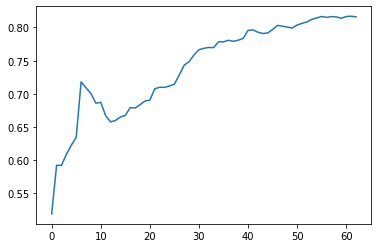

In [40]:
plt.plot(list(range(len(t))),t)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
lr.fit(df[cols],df['HighUtilizationY2'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
import numpy as np
clf = LogisticRegression(random_state = 0)
clf.fit(df[cols],df['HighUtilizationY2'])

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
posi = np.arange(sorted_idx.shape[0]) + .5
posi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5])

In [45]:
p=[]
for i in range(1,len(res.index)):
    c = list(res[:i]['cols'])
    print(c)
    lr.fit(df[c],df['HighUtilizationY2'])
    probs = lr.predict_proba(test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    thresholds
    a=auc(fpr,tpr)
    print(a)
    p.append(a)

['age']
0.5234290035821082
['age', 'ELIX1']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5875680810469582
['age', 'ELIX1', 'ELIX2']
0.590190215296538
['age', 'ELIX1', 'ELIX2', 'ELIX3']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.609862370494636
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.631641968897427
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6473523751663816
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7270521541148136
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7300727915981674
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7373728115151421
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.757717893243836
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.762656743022493
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7626973989321593
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7658757643163654
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7737554625136139
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7844913734479939
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7851856349162841
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.787346472773181
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7874772004343878
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7879126918678946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7879095317428179
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7878592153471654
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7953371683170378
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.796263117711941
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7962485942355519
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7965543895512708
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7968437620408133
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7998653983201758
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8036033023274305
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8040796297813593
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8076990536587928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8117501702701588
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.812150016147748
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8121686821715175
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8120532639245426
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8207833959889532
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.821386193940773
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8213964766275512
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8213950029940957
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8213969023438827
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8261563454361867
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8262518696315124
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8277666338341132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8277717424300923
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8277937159422841
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8277250446232585
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8294500963199574
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8297778978952781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8297777996530478
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8298148369738956
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8314458217350194
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8344306499254046
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8344306499254046
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8355447331914585
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8359141239776341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8362310861602044
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8371245010031514
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8370176134565134
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.837227246002409
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8376296134305775
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8374365183267933
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8380432623415329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8388978878771904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8388972001815778


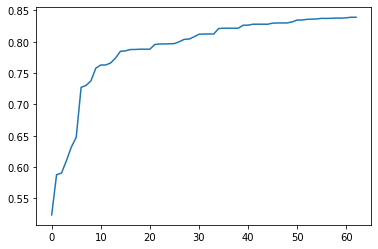

In [46]:
plt.plot(list(range(len(p))),p)

In [47]:
#3. Create a learning curve for the data to check AUC (y axis) based on size of data (x axis)

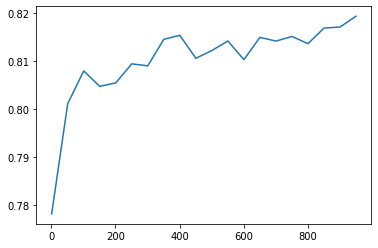

In [51]:
r = []
for i in range(1, 1000, 50):
    s = int(i/1000.0*len(train.index))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train[:s][cols],train[:s]['HighUtilizationY2'])
    probs = rf.predict_proba(test[cols])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    a=auc(fpr,tpr)
    r.append(a)
plt.plot(list(range(1, 1000, 50)),r)
    

In [52]:
#4. Create more learning curves (on one plot) for different numbers of input attributes. Do it for random forest, logistic regression, and naïve Bayes.
#a. Use random selection of input attributes (repeat 10 times and compare)
#b. Use ranking of attributes from question 2

In [55]:
nb = GaussianNB()

In [58]:
AUC_lr = []
AUC_nb=[]
AUC_rf=[]

for i in range(1, 1000, 5):
    s = int(i/1000.0*len(train.index))
    print(s)
    #lr
    lr.fit(train[:s][cols],train[:s]['HighUtilizationY2'])
    probs = lr.predict_proba(test[cols])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    alr=auc(fpr,tpr)
    AUC_lr.append(alr)
    # RF
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train[:s][cols],train[:s]['HighUtilizationY2'])
    probs = rf.predict_proba(test[cols])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    arf=auc(fpr,tpr)
    AUC_rf.append(arf)
    #NB
    nb.fit(train[:s][cols],train[:s]['HighUtilizationY2'])
    probs = nb.predict_proba(test[cols])[:,1]
    fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
    rf_nb=auc(fpr,tpr)
   # print(a)
    AUC_nb.append(rf_nb)

90


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


542


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


994


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1446


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1898


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2350


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2802


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3255


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3707


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4159


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4611


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5063


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5515


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5967


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6419


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6871


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7323


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7776


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8228


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8680


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9132


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9584


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10036


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10940


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11392


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11844


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12296


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12749


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13201


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13653


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14105


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14557


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15009


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15461


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15913


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16365


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16817


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17270


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17722


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18174


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18626


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19078


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19530


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19982


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20434


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20886


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


21338


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


21790


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


22243


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


22695


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


23147


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


23599


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


24051


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


24503


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


24955


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


25407


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


25859


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


26311


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


26764


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


27216


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


27668


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


28120


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


28572


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


29024


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


29476


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


29928


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


30380


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


30832


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


31284


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


31737


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


32189


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


32641


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


33093


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


33545


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


33997


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


34449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


34901


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


35353


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


35805


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


36258


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


36710


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


37162


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


37614


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


38066


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


38518


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


38970


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


39422


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


39874


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


40326


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


40778


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


41231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


41683


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


42135


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


42587


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


43039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


43491


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


43943


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


44395


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


44847


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


45299


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


45752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


46204


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


46656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


47108


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


47560


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


48012


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


48464


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


48916


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


49368


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


49820


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


50272


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


50725


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


51177


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


51629


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


52081


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


52533


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


52985


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


53437


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


53889


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


54341


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


54793


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


55246


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


55698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


56150


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


56602


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


57054


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


57506


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


57958


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


58410


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


58862


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


59314


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


59766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


60219


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


60671


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


61123


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


61575


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


62027


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


62479


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


62931


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


63383


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


63835


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


64287


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


64740


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


65192


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


65644


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


66096


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


66548


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67452


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67904


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


68356


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


68808


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


69260


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


69713


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


70165


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


70617


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


71069


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


71521


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


71973


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


72425


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


72877


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


73329


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


73781


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


74233


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


74686


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


75138


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


75590


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


76042


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


76494


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


76946


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


77398


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


77850


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78302


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78754


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79207


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79659


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80111


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80563


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81015


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81467


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81919


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82371


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82823


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83275


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83727


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


84180


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


84632


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


85084


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


85536


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


85988


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


86440


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


86892


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


87344


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


87796


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


88248


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


88701


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89153


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89605


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


90057


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


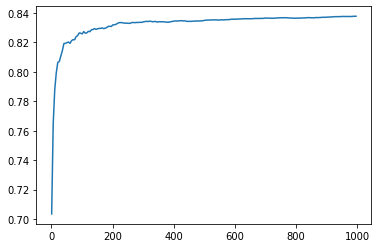

In [61]:
plt.plot(list(range(1, 1000, 5)),AUC_lr)

In [95]:
#5. Create 3D plot with learning curves
#as follows: x-axis number of attributes, y-axis size of training data, z-axis AUC of obtained models

In [113]:
cols

['age',
 'ELIX1',
 'ELIX2',
 'ELIX3',
 'ELIX4',
 'ELIX5',
 'ELIX6',
 'ELIX7',
 'ELIX8',
 'ELIX9',
 'ELIX10',
 'ELIX11',
 'ELIX12',
 'ELIX13',
 'ELIX14',
 'ELIX15',
 'ELIX16',
 'ELIX17',
 'ELIX18',
 'ELIX19',
 'ELIX20',
 'ELIX21',
 'ELIX22',
 'ELIX23',
 'ELIX24',
 'ELIX25',
 'ELIX26',
 'ELIX27',
 'ELIX28',
 'ELIX29',
 'G-2',
 'G-3',
 'G-4',
 'G-5',
 'G-6',
 'G-7',
 'G-8',
 'G-9',
 'G-10',
 'G-11',
 'G-12',
 'G-13',
 'G-14',
 'G-15',
 'G-16',
 'G-17',
 'G-18',
 'G-19',
 'G-20',
 'G-21',
 'G-22',
 'G-23',
 'drugs_m0-1',
 'drugs_m1-2',
 'drugs_m2-3',
 'drugs_m3-4',
 'drugs_m4-5',
 'drugs_m5-6',
 'drugs_m6-7',
 'drugs_m7-8',
 'drugs_m8-9',
 'drugs_m9-10',
 'drugs_m10-11',
 'drugs_m11-12']

In [127]:
rAUC=[]
siz=[]
att=[]
c=[]
for i in range(1,1000):
    for j in range(1, 500, 100):
        colus = random.choice(cols)
        c.append(colus)
        print(c)
        s = int(j/1000.0*len(train.index))
        siz.append(s)
        att.append(i)
        rf = RandomForestClassifier(n_estimators=5)
        rf.fit(train[c],train['HighUtilizationY2'])
        probs = rf.predict_proba(test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(test['HighUtilizationY2'], probs)
        a=auc(fpr,tpr)
        print(a)
        rAUC.append(a)
    
        
        

['ELIX29']
0.5917959681781627
['ELIX29', 'ELIX2']
0.5934295399846861
['ELIX29', 'ELIX2', 'ELIX20']
0.5997966353084017
['ELIX29', 'ELIX2', 'ELIX20', 'G-6']
0.6750838481062468
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4']
0.6751575625264312
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12']
0.6857764178433302
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12']
0.7111327538744607
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16']
0.7114053269426107
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24']
0.7127267504358518
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4']
0.710035584645735
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28']
0.7053290122470728
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13']
0.7126219914708715
['ELIX29', 'ELIX2', 'E

0.6639959516341712
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10']
0.6534915812630584
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10']
0.6722757413145846
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX

0.6577226776404549
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15']
0.6651849609745839
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10',

0.6701318338687208
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8']
0.6671669324773947
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-

0.6685614809374378
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12']
0.6752712942817848
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 

0.6762523575679231
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17']
0.6745593000909132
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4

0.6835917726192746
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6902608154380199
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6853709230374952
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6799292695238259
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6815876966146317
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6842127290100072
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6926825846587685
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6930474235549371
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.692642747434355
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.6935843009701813
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6933029679698236
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6995051145887551
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7045442860583206
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6997843845022751
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6972970713401676
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7050488909008897
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7107113929484216
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6990511863633497
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.697239485019468
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7054902277471032
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6980534546454592
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.705088990104584
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.703263698585502
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7037760154431547
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6976337474636313
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7032274472024969
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6951476459556982
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7046879325728206
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.695204806560066
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7041656113813753
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7037949270724999
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7127519168205304
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7098454204351566
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6988390977616948
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7009212927131839
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7098649215178844
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6990631391680442
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7077417759300378
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7036604498328343
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7096994816019482
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7089533646097298
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7138654433806121
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7023536480582129
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7024428028822698
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7039940640734517
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7020031689013827
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7029488322371793
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7075439651991963
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6995741952504074
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.719051617974215
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7091591984560512
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7057326077031209
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7054064107508962
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7013229560720347
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7113520960274575
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7101475480409418
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6988143079722325
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7095951319795947
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7062901814815623
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.702412478780497
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.707701005404436
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7066783037863276
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7082479035271776
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6936737668946346
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7033216451277124
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7101356607310676
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7088902112293096
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6975230775911241
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6986135827218901
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7044945591160505
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7018978041093153
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7043592795648367
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7138527865065999
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.714089353797321
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7003307914138649
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6993653650160596
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7014303839509396
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7035006260977341
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7070986167952429
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7100193746777246
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.695857364201566
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7158208239864038
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7039054823290718
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7101693414423779
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7040385350563972
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.708845511014493
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.707917416664227
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7032910590466588
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7069823471156048
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7043004815899627
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6997281244516855
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6997316611719787
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.698327321236309
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7139957125780771
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7096866118697703
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.694922311026649
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7082371460029527
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7145532536091085
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7097956116243613
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7043654524516447
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7017889189706599
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7134616841875134
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7074285960733366
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7090669817491478
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7054971865717542
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7091173308922104
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.705553266511588
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7070592544082762
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7035196359693099
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.699227170945345
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7141921315439886
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.707057060331798
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7105738210784993
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7029715753135088
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7053862547199662
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7061405094436
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11-1

0.7124656389612443
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7076988768227781
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7227135152425768
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7164969106420765
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7032015112536801
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7057532058240876
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.699138834806541
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7139330340351039
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7093173848206454
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7068206076570126
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7097551358254505
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7048556975548754
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7015551679572094
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7052291817673162
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.696471476383583
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7015178850307855
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6971450087412662
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7067791003146829
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7108131718990807
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.70300402799694
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11-

0.7120040805892804
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7088906369456411
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7070469741294805
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7061619917446399
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.699923184400077
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7058931846286538
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7028588751015743
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7096862025271439
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7079229673502426
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6983621153595636
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7056128504243049
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7086549374612885
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7047582576360574
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.698139858687066
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7002154222880053
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7070187294882503
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7033282273571472
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7027878459690197
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7043869511263898
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6939308340640917
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7078388392536394
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7194784313440394
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.715124564926096
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m11

0.7043712814906464
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7028199220572342
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6961474243867213
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7022404893825364
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6978139728352374
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.6979541972453795
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7049382046546775
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7098698663768127
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7059718930288819
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7104329744675647
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7018920241914288
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7167879696232404
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7092132971775728
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

0.7091221283877932
['ELIX29', 'ELIX2', 'ELIX20', 'G-6', 'G-4', 'ELIX12', 'drugs_m11-12', 'G-16', 'ELIX24', 'ELIX4', 'ELIX28', 'G-13', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m1-2', 'ELIX25', 'G-2', 'drugs_m1-2', 'G-15', 'G-19', 'G-11', 'ELIX6', 'G-15', 'G-21', 'G-10', 'G-2', 'G-22', 'drugs_m2-3', 'age', 'drugs_m10-11', 'drugs_m3-4', 'age', 'ELIX2', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'G-21', 'G-10', 'ELIX10', 'ELIX10', 'G-5', 'G-4', 'ELIX5', 'drugs_m7-8', 'drugs_m4-5', 'ELIX28', 'ELIX19', 'G-14', 'G-18', 'G-22', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'drugs_m3-4', 'ELIX15', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX21', 'G-11', 'ELIX4', 'G-5', 'G-16', 'ELIX21', 'G-23', 'G-13', 'drugs_m11-12', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX6', 'ELIX17', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m11-12', 'drugs_m5-6', 'G-16', 'ELIX23', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m6-7', 'ELIX15', 'G-7', 'ELIX17', 'G-13', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'ELIX13', 'drugs_m1

KeyboardInterrupt: 

In [128]:
print(att)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 

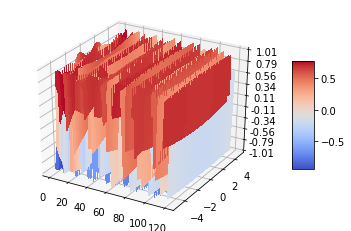

In [129]:
fig = plt.figure()
ax = fig.gca(projection='3d')
print(att)

# Make data.
X = np.array(att)
print(X)
print(type(X))
Y = np.arange(-5, 5, 0.25)
print(type(Y))
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()